<a href="https://colab.research.google.com/github/jperdomos/Parcial2/blob/main/Parcial_2_SyS_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Parcial 2- Señales y Sistemas 2024-1
*   Andres Fernando Sosapanta Lopez
*   Juan Camilo Perdomo Soto

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|A sin(2πF ot)|^2$, con $t\in [-\frac{π}{2F_o},\frac{π}{2F_o}]$.


## Solución:

Tenemos

$$x(t)=|A sin(2πF ot)|^2 = A^2\sin^2(2π2F ot) = A^2\left(\frac{1}{2}-\frac{\cos(2π2F ot)}{2}\right) = \frac{A^2}{2}-\frac{A^2\cos(2w_o t)}{2} $$

$$w_o = 2πF_o$$

Ahora, por serie trigonométrica:

$$x(t) = a_0 + \sum_{n=-N}^N{a_n\cos(n\omega_0 t) + b_n\sin(n\omega_0 t)},$$

donde:

$$a_0 = c_0 = \frac{1}{tf-ti}\int_{t_i}^{t_f}x(t)dt$$

y

$$a_n = \frac{2}{tf-ti}\int_{t_i}^{t_f}x(t)\cos(n\omega_0 t)dt$$

$$b_n = \frac{2}{tf-ti}\int_{t_i}^{t_f}x(t)\sin(n\omega_0 t)dt$$

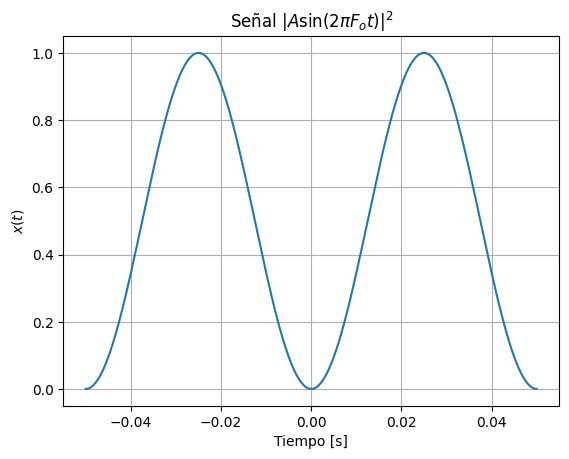

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
F_o = 10  # Frecuencia fundamental
ti = -1 / (2 * F_o)  # Tiempo inicial
tf = 1 / (2 * F_o)   # Tiempo final
T = tf - ti          # Periodo total
wo = 2 * np.pi / T   # Frecuencia angular
Fs = 100 * F_o       # Frecuencia de muestreo, suficientemente alta para Nyquist

# Vector de tiempo
tv = np.linspace(ti, tf, 1000)

# Señal x(t) = |A*sin(2*pi*Fo*t)|^2
A = 1
x = abs(A * np.sin(2 * np.pi * F_o * tv))**2

# Graficar la señal
plt.plot(tv, x)
plt.xlabel('Tiempo [s]')
plt.ylabel('$x(t)$')
plt.title('Señal $|A\sin(2\pi F_o t)|^2$')
plt.grid(True)
plt.show()


Dado que $x(t)$ presenta simetría par, $x(t)=x(-t)$:


 $$\boxed{b_n = 0 \quad \forall n \in \{0,1,\dots,N\}}$$

Así:

$$x(t)=|A sin(2πF ot)|^2 = \frac{A^2}{2}-\frac{A^2\cos(2π2F ot)}{2}  = a_0 + \sum_{n=-N}^N{a_n\cos(n\omega_0 t)}$$

Analizando la igualdad:

$a_0$ codifica el nivel DC de la señal, entonces:

$$\boxed{a_0 = \frac{A^2}{2}} $$

Coeficientes $a_n$

$$\boxed{a_n = -\frac{A^2}{2}} $$

Por consiguiente:

$$\boxed{a_n = \left\{\begin{align} \frac{A^2}{2} & \quad n = 0\\
-\frac{A^2}{2} & \quad n = 2 \\
0 & \quad \forall n \setminus \{0,2\}
\end{align}\right.}$$


$$\boxed{b_n = 0 \quad \forall n\in \{0,1,2,\dots,N\}}$$

Entonces:

$$x(t) = \frac{A^2}{2}-\frac{A^2\cos(2w_o t)}{2} $$

Para el caso de la serie exponencial compleja:

$$c_0 = a_0 = \frac{A^2}{2}$$

y

$$c_n = \frac{a_n - j b_n}{2}$$

Entonces:

$$\boxed{c_n = \left\{\begin{align} \frac{A^2}{2} & \quad n = 0\\
-\frac{A^2}{4} & \quad n = \{2,-2\}\\
0 & \quad \forall n \setminus \{0,2,-2\}
\end{align}\right.}$$

y

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n t}}}$$


$${x(t) = c_{-2}e^{-j2t} + c_{0}e^{0} + c_{2}e^{j2t} = \frac{A^2}{2}} δ(f) - \frac{A^2}{4} δ(f-2F_o)- \frac{A^2}{4} δ(f+2F_o) $$




## Pregunta 2:


Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase como diagrama de
Bode en decibelios), y presente el error relativo y la señal reconstruida para $N = {1, 2, . . . , 50}.$


## Solución:

In [ ]:
#se crean las bases de la serie exponencial compleja de Fourier

T = tf - ti #intervalo de interés
N = 10 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
phin.shape #tamaño matriz phin

(1000, 21)

In [ ]:
# graficar bases
from ipywidgets import interact,IntSlider
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(tv,x,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

In [ ]:
#calcular espectro
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = A**2 / 2 # nivel dc C_0
cn[N-2] = -A**2 / 4 #armónico -2
cn[N+2] = -A**2 / 4 #armónico 2


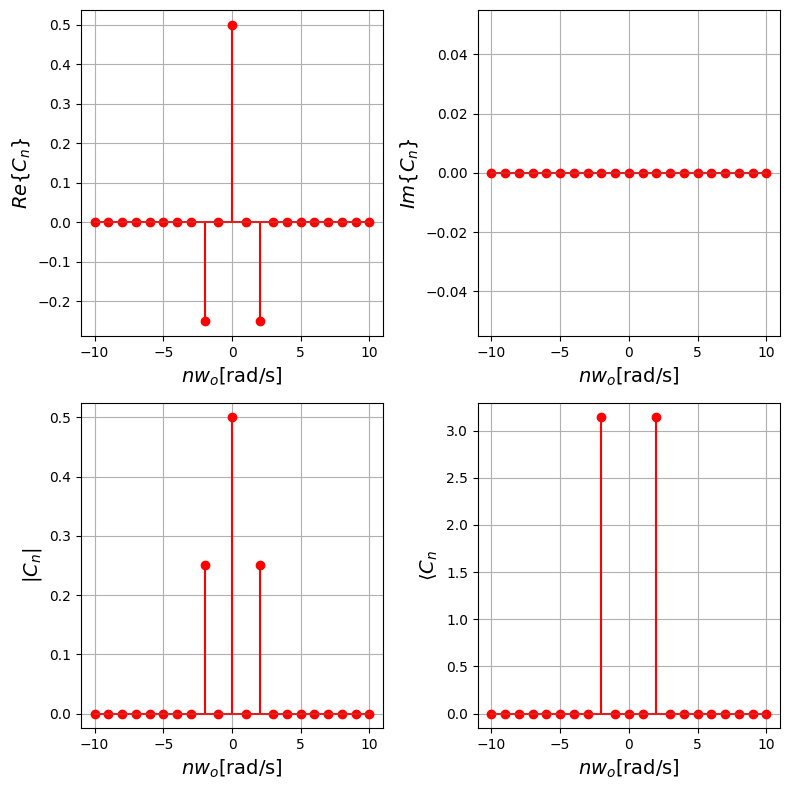

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
# Graficar reconstrucción
Px = (A**2) / 2  # Potencia de la señal original

def pltest(Na=1):
    ind = np.arange(N-Na, N+Na+1)  # Corregir el índice para incluir la parte central
    er = 1 - np.sum(abs(cn[ind])**2) / Px  # Error relativo basado en la energía
    # Señal reconstruida
    xe = phin[:, ind].dot(cn[ind])  # Producto entre las bases y los coeficientes
    # Graficar
    plt.plot(tv, xe, color='b', label='$x_e(t)$')  # Señal reconstruida
    plt.plot(tv, x, color='r', label='$x(t)$')     # Señal original
    plt.title('Error Relativo = %.2f%%' % (100 * er), fontsize=16)
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Interfaz interactiva
interact(pltest, Na=(1, N, 1))


interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


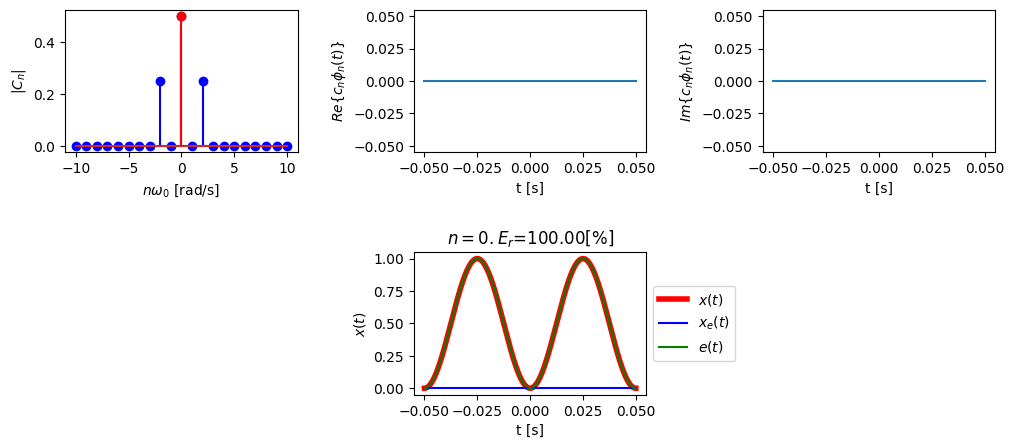

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from ipywidgets import interact

# Parámetros
A = 1.0  # Amplitud
Fo = 10  # Frecuencia en Hz
T = 1 / Fo
tv = np.linspace(-T/2, T/2, 1000)  # Tiempo
x = A**2 * np.sin(2 * np.pi * Fo * tv)**2  # Señal original

N = 10  # Número máximo de armónicos
Cn = np.zeros(2*N+1, dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1)  # Vector armónicos
Cn[N] = A**2 / 2  # Nivel DC C_0
Cn[N-2] = -A**2 / 4  # Armónico -2
Cn[N+2] = -A**2 / 4  # Armónico 2

# Crear la base de Fourier
phin = np.zeros((len(tv), 2*N+1), dtype=np.complex_)
wo_num = 2 * np.pi / T  # Frecuencia angular fundamental
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo_num * tv)

# Función para actualizar la animación
def update(n):
    # Limpiar ejes
    for row in ax:
        for subplot in row:
            subplot.clear()

    # Determinar los armónicos a considerar (del centro hacia los externos)
    ind = np.concatenate([np.arange(N - n, N + 1), np.arange(N + 1, N + n + 1)])
    ind = np.unique(ind)  # Eliminar duplicados si los hay

    # Actualización de espectro
    ax[0, 0].stem(nv, np.abs(Cn), 'b')  # Magnitud del espectro

    # Fix: Check for empty array and handle it
    if len(ind) > 0:
        ax[0, 0].stem(nv[ind], np.abs(Cn[ind]), 'r')  # Magnitud del espectro con el rango actualizado

    ax[0, 0].set_xlabel(r'$n\omega_0$ [rad/s]')
    ax[0, 0].set_ylabel(r'$|C_n|$')

    # Componentes espectrales
    if n > 0:
        ce = phin[:, ind].dot(np.diag(Cn[ind]))
    else:
        ce = np.zeros_like(tv)
    ax[0, 1].plot(tv, np.real(ce))  # Componente real
    ax[0, 1].set_xlabel('t [s]')
    ax[0, 1].set_ylabel(r'$Re\{c_n \phi_n(t)\}$')

    ax[0, 2].plot(tv, np.imag(ce))  # Componente imaginario
    ax[0, 2].set_xlabel('t [s]')
    ax[0, 2].set_ylabel(r'$Im\{c_n \phi_n(t)\}$')

    # Reconstrucción de la señal
    xe = np.zeros_like(tv)
    if n > 0:
        xe = phin[:, ind].dot(Cn[ind])
    et = x - xe

    # Calcular el error relativo
    error_relativo = np.linalg.norm(x - xe) / np.linalg.norm(x)

    ax[1, 1].plot(tv, x, 'r', linewidth=4, label='$x(t)$')
    ax[1, 1].plot(tv, xe, color='b', label='$x_e(t)$')  # Señal estimada
    ax[1, 1].plot(tv, et, color='g', label='$e(t)$')  # Error
    ax[1, 1].set_title(f'$n={n}. E_r$={100*error_relativo:.2f}[%]')
    ax[1, 1].set_xlabel('t [s]')
    ax[1, 1].set_ylabel('$x(t)$')
    ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Ejes vacíos
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')

    plt.subplots_adjust(wspace=0.5, hspace=0.7)

# Crear la figura y los ejes para la animación
fig, ax = plt.subplots(2, 3, figsize=(12, 5))

# Crear la animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, N + 1), blit=False)
rc('animation', html='jshtml')
anim


<ipython-input-9-e6b0eb1c6239>:43: RuntimeWarning: divide by zero encountered in log10
  ax1.semilogx(log_freq, 20 * np.log10(log_magnitudes), 'b-', marker='o')  # Magnitud en dB


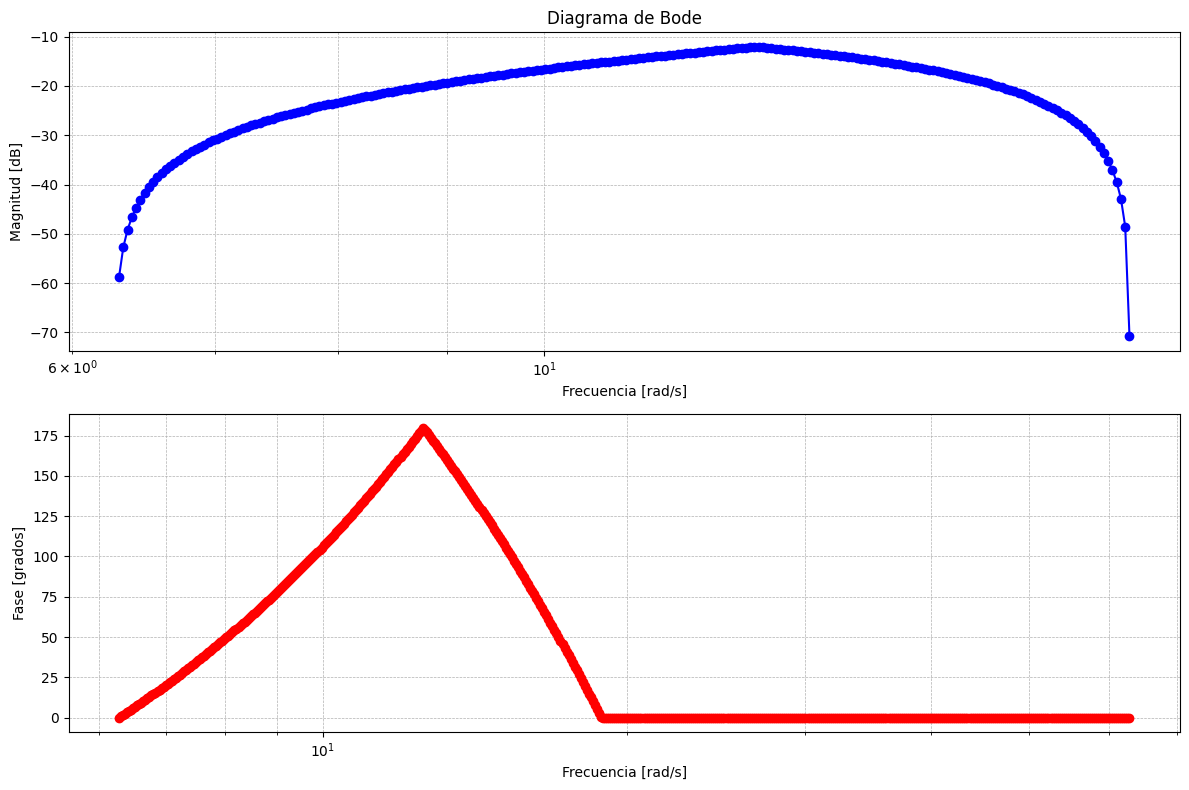

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1.0  # Amplitud
Fo = 1  # Frecuencia en Hz
T = 1 / Fo
tv = np.linspace(-T/2, T/2, 100)  # Tiempo
x = A**2 * np.sin(2 * np.pi * Fo * tv)**2  # Señal original

# Parámetros de la Serie de Fourier
N = 10  # Número máximo de armónicos
Cn = np.zeros(2*N+1, dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1)  # Vector armónicos
Cn[N] = A**2 / 2  # Nivel DC C_0
Cn[N-2] = -A**2 / 4  # Armónico -2
Cn[N+2] = -A**2 / 4  # Armónico 2

# Calcular magnitudes y fases
magnitudes = np.abs(Cn)
phases = np.angle(Cn, deg=True)  # Fase en grados

# Frecuencias asociadas a los armónicos
frequencies = np.linspace(-N, N, 2*N + 1) * 2 * np.pi / T

# Crear frecuencias logarítmicas para el Diagrama de Bode
log_freq = np.logspace(np.log10(np.min(frequencies[frequencies > 0])), np.log10(np.max(frequencies)), num=500)

# Interpolación de magnitudes y fases
from scipy.interpolate import interp1d

mag_interp = interp1d(frequencies, magnitudes, kind='linear', fill_value='extrapolate')
phase_interp = interp1d(frequencies, phases, kind='linear', fill_value='extrapolate')

# Interpolación para las frecuencias logarítmicas
log_magnitudes = mag_interp(log_freq)
log_phases = phase_interp(log_freq)

# Graficar el Diagrama de Bode
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Diagrama de Bode - Magnitud
ax1.semilogx(log_freq, 20 * np.log10(log_magnitudes), 'b-', marker='o')  # Magnitud en dB
ax1.set_title('Diagrama de Bode')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Diagrama de Bode - Fase
ax2.semilogx(log_freq, log_phases, 'r-', marker='o')  # Fase en grados
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## Pregunta 3:

Sea la señal portadora $c(t) = A_c\sin(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 0.5). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

## Solución:

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathcal{F}\{y(t)\} = \mathcal{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathcal{F}\{c(t)\}+\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier):

$$C(\omega) = \mathcal{F}\{c(t)\} = \mathcal{F}\{A_c\sin(2\pi F_c t)\} = A_c\mathcal{F}\left\{\frac{e^{2\pi F_ct}-e^{-2\pi F_ct}}{2j}\right\}$$

y

$$\mathcal{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathcal{F}\{m(t)A_c\sin(2\pi F_c t)\} = \mathcal{F}\{m(t)\sin(2\pi F_c t)\} = \mathcal{F}\left\{\frac{m(t)e^{2\pi F_ct}-m(t)e^{-2\pi F_ct}}{2j}\right\}$$

teniendo en cuenta que:

$$\mathcal{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


In [ ]:

!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.8-py3-none-any.whl.metadata (9.9 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/

In [ ]:
import os #usar funcionalidades dependientes del sistema operativo
import yt_dlp as youtube_dl
#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [ ]:
link_= ['https://youtu.be/rteD0raiERQ?si=LDQAesM9TsgWS5tP']
name_ = ['Oblivion']
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

Oblivion
[youtube] Extracting URL: https://youtu.be/rteD0raiERQ?si=LDQAesM9TsgWS5tP
[youtube] rteD0raiERQ: Downloading webpage
[youtube] rteD0raiERQ: Downloading ios player API JSON
[youtube] rteD0raiERQ: Downloading web creator player API JSON
[youtube] rteD0raiERQ: Downloading player 5f8f5b0f
[youtube] rteD0raiERQ: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=rteD0raiERQ
[youtube] rteD0raiERQ: Downloading webpage
[youtube] rteD0raiERQ: Downloading ios player API JSON
[youtube] rteD0raiERQ: Downloading web creator player API JSON
[youtube] rteD0raiERQ: Downloading m3u8 information
[info] rteD0raiERQ: Downloading 1 format(s): 251
[download] Destination: Oblivion.mp3
[download] 100% of    2.63MiB in 00:00:00 at 7.28MiB/s   
Download complete... Oblivion.mp3


In [ ]:

import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])

In [ ]:

!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

Frecuencia de muestreo 48000.00[Hz]
audio Oblivion.wav


In [ ]:

xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal


In [ ]:
#reproducir fragmento original #señal mensaje
Audio(m,rate=fs)


In [ ]:

Fc = 15000 #frecuencia de portadora
ts = 5 #t segmento
t = np.arange(0,ts,1/fs) #vector del tiempo
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = np.max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora

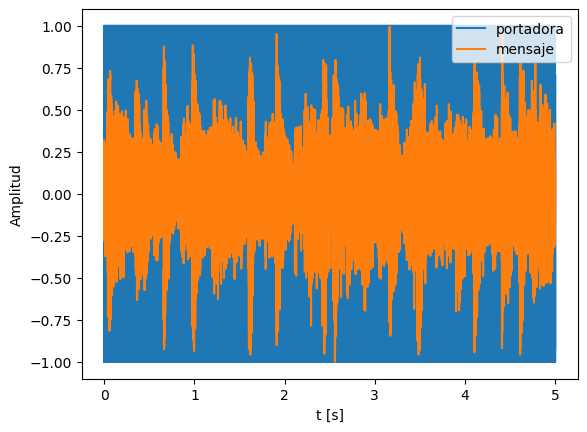

In [ ]:

#Grafica señal portadora y señal mensaje en el tiempo
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [ ]:

#repoducir portadora
Audio(c,rate=fs)

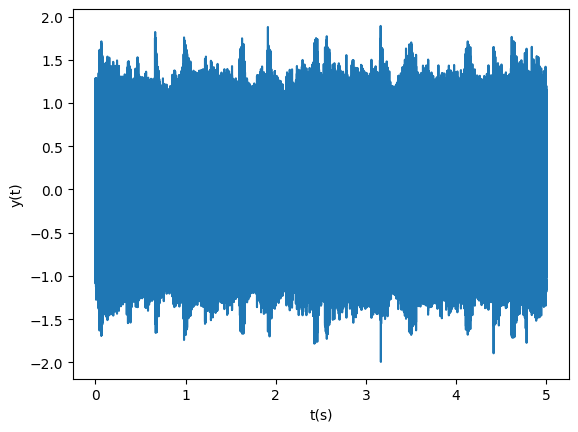

In [ ]:

y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('t(s)')
plt.ylabel('y(t)')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


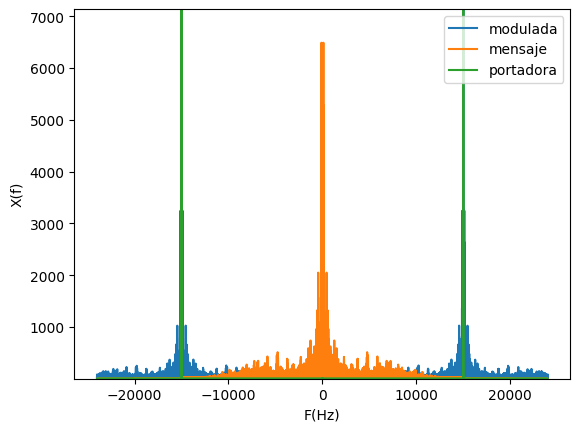

In [ ]:
#calculo de espectros
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/fs)

plt.plot(vfre,abs(Xfy),label='modulada')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('F(Hz)')
plt.ylabel('X(f)')
plt.ylim([np.min(abs(Xfm)), 1.1*np.max(abs(Xfm))])
plt.show()

# Punto 4
Consulte en qué consiste la distorson total de arm´onicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un
circuito el´ectrico. C´omo puede calcularse el THD desde la FFT?. C´omo puede calcularse la distorsi´on del factor de potencia
con base al THD?. Genere un ejemplo ilustrativo para el c´alculo del THD y la distorsi´on del factor de potencia para un
rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias
para las simulaciones. El usuario podr´a escoger diferentes valores de R y C. Discuta los resultados obtenidos.

### 1. **Distorsión Total de Armónicos (THD)**

La **distorsión total de armónicos** (THD, por sus siglas en inglés) mide la distorsión presente en una señal debido a la presencia de armónicos. Se define como la relación entre la suma de las potencias de todos los armónicos (es decir, las componentes de frecuencia diferentes de la fundamental) y la potencia de la componente fundamental. Matemáticamente, se expresa como:

$$
\text{THD} = \frac{\sqrt{V_2^2 + V_3^2 + V_4^2 + \cdots}}{V_1}
$$

Donde $(V_1)$ es la amplitud de la componente fundamental, y $( V_2, V_3, V_4...)$ son las amplitudes de los armónicos.

### 2. **Factor de Potencia (PF)**

El **factor de potencia** es la relación entre la potencia real que realiza trabajo útil y la potencia aparente que fluye en el circuito. Cuando hay distorsión armónica, el factor de potencia puede verse afectado. El factor de potencia corregido por armónicos se puede calcular utilizando el THD:

$$
\text{PF} = \cos(\theta) \cdot \frac{1}{\sqrt{1 + \text{THD}^2}}
$$
Donde $ \cos(\theta)$ es el desplazamiento de fase entre la tensión y la corriente.


***

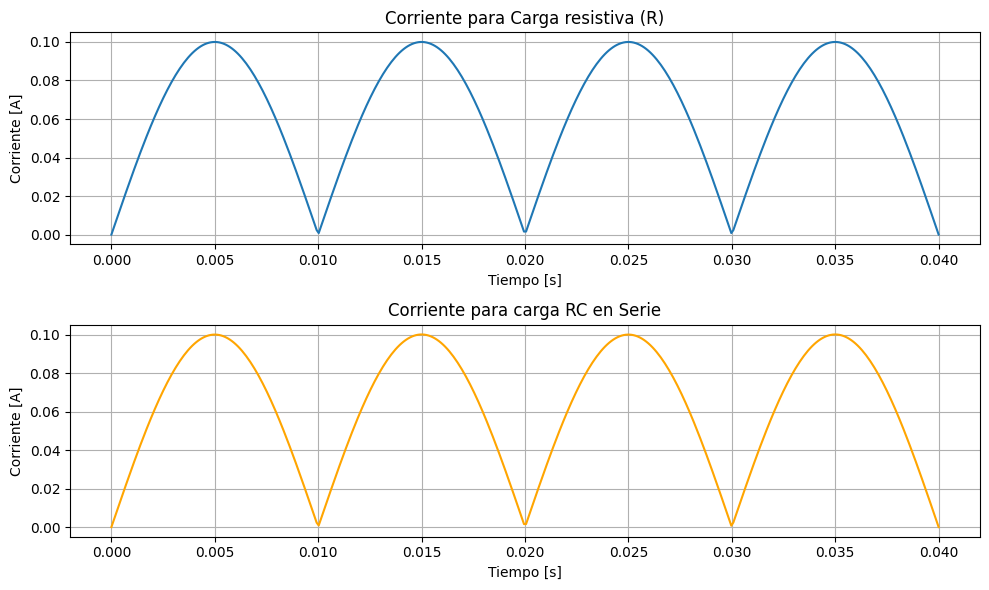

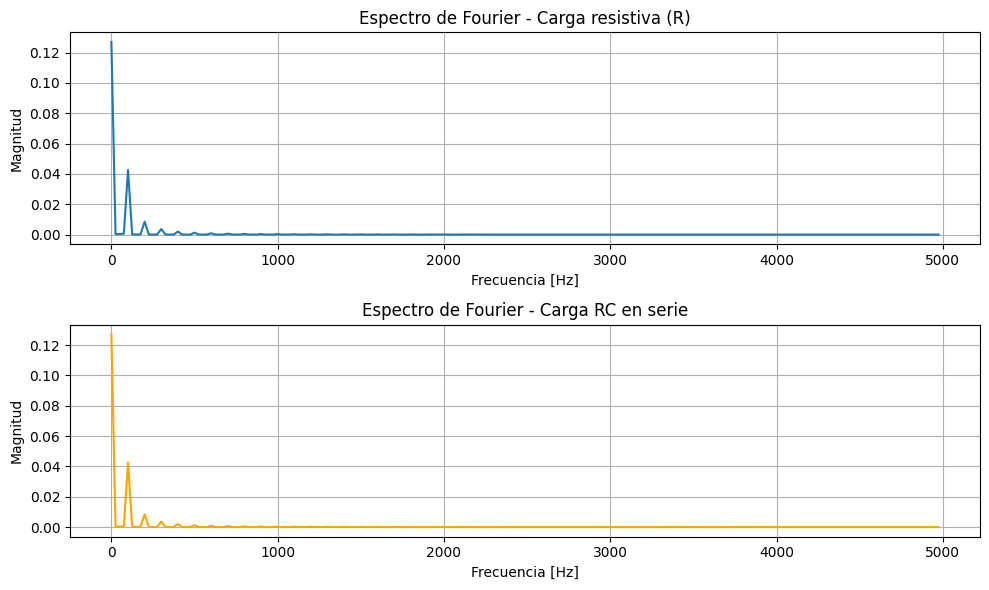

THD para carga resistiva: 34.41%
Factor de potencia para carga resistiva: 0.95
THD para carga RC: 34.41%
Factor de potencia para carga RC: 0.95


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import square

# Definimos los parámetros de simulación
Fs = 10000  # Frecuencia de muestreo
T = 1 / 50  # Periodo de la señal, que es de 50 Hz
t = np.linspace(0, 2 * T, int(Fs * 2 * T))  # Generamos el vector de tiempo para dos periodos
f = 50  # Frecuencia fundamental de la señal de entrada

# Generamos la señal de voltaje de entrada, que es una onda seno con la frecuencia de 50 Hz
Vin = np.sin(2 * np.pi * f * t)

# Simulamos el rectificador de onda completa con una carga resistiva
R = 10  # Definimos el valor de la resistencia en ohmios
I_R = np.abs(Vin / R)  # Calculamos la corriente a través de la carga resistiva, usando rectificación de valor absoluto

# Simulamos el rectificador de onda completa con una carga RC
C = 1000e-3  # Capacitancia en faradios
V_C = np.zeros_like(t)  # Inicializamos el voltaje en el condensador como un vector de ceros
I_RC = np.zeros_like(t)  # Inicializamos la corriente en la carga RC como un vector de ceros

# Usamos un ciclo para calcular el voltaje en el condensador y la corriente en la carga RC
for i in range(1, len(t)):
    # Calculamos el voltaje en el condensador usando el método de Euler
    V_C[i] = V_C[i-1] + (Vin[i-1] - V_C[i-1]) / (R * C) * (t[i] - t[i-1])
    # Calculamos la corriente en la carga RC como el valor absoluto del voltaje sobre la resistencia
    I_RC[i] = np.abs((Vin[i] - V_C[i]) / R)

# Función para calcular la transformada de Fourier (FFT) de una señal
def calculate_fft(signal, Fs):
    N = len(signal)  # Longitud de la señal
    fft_values = fft(signal)  # Calculamos la FFT
    fft_magnitude = 2.0 / N * np.abs(fft_values[:N // 2])  # Calculamos la magnitud de la FFT
    freqs = np.fft.fftfreq(N, 1 / Fs)[:N // 2]  # Generamos las frecuencias correspondientes
    return freqs, fft_magnitude  # Retornamos las frecuencias y magnitudes de la FFT

# Función para calcular el THD (distorsión armónica total) a partir de la FFT de una señal
def calculate_thd(signal, Fs):
    freqs, magnitudes = calculate_fft(signal, Fs)  # Calculamos la FFT de la señal
    fundamental_index = np.argmax(magnitudes)  # Detectamos la frecuencia fundamental buscando el valor máximo
    fundamental = magnitudes[fundamental_index]  # Obtenemos la magnitud de la componente fundamental
    harmonic_sum = np.sqrt(np.sum(magnitudes[fundamental_index+1:]**2))  # Sumamos las potencias de los armónicos
    thd = harmonic_sum / fundamental  # Calculamos el THD como la razón entre los armónicos y la fundamental
    return thd  # Retornamos el valor del THD

# Calculamos el THD y el factor de potencia para ambas configuraciones (resistiva y RC)
thd_resistive = calculate_thd(I_R, Fs)
thd_rc = calculate_thd(I_RC, Fs)

# Función para calcular el factor de potencia en función del THD
def power_factor(thd):
    return 1 / np.sqrt(1 + thd**2)  # Factor de potencia en función del THD, considerando solo la distorsión

pf_resistive = power_factor(thd_resistive)  # Factor de potencia para la carga resistiva
pf_rc = power_factor(thd_rc)  # Factor de potencia para la carga RC

# Graficamos las corrientes para las cargas resistiva y RC
plt.figure(figsize=(10, 6))

# Gráfico para la corriente de la carga resistiva
plt.subplot(2, 1, 1)
plt.plot(t, I_R, label='Carga resistiva (R)')
plt.title('Corriente para Carga resistiva (R)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')
plt.grid()

# Gráfico para la corriente de la carga RC
plt.subplot(2, 1, 2)
plt.plot(t, I_RC, label='Carga RC en Serie', color='orange')
plt.title('Corriente para carga RC en Serie')
plt.xlabel('Tiempo [s]')
plt.ylabel('Corriente [A]')
plt.grid()

plt.tight_layout()  # Ajustamos el diseño para evitar superposiciones
plt.show()

# Calculamos la FFT para la corriente de la carga resistiva
freqs_R, fft_magnitude_R = calculate_fft(I_R, Fs)

# Calculamos la FFT para la corriente de la carga RC
freqs_RC, fft_magnitude_RC = calculate_fft(I_RC, Fs)

# Graficamos los espectros de Fourier para ambas corrientes
plt.figure(figsize=(10, 6))

# Gráfico para la FFT de la carga resistiva
plt.subplot(2, 1, 1)
plt.plot(freqs_R, fft_magnitude_R)
plt.title('Espectro de Fourier - Carga resistiva (R)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid()

# Gráfico para la FFT de la carga RC
plt.subplot(2, 1, 2)
plt.plot(freqs_RC, fft_magnitude_RC, color='orange')
plt.title('Espectro de Fourier - Carga RC en serie')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid()

plt.tight_layout()  # Ajustamos el diseño para evitar superposiciones
plt.show()

# Mostramos los resultados de THD y factor de potencia
print(f"THD para carga resistiva: {thd_resistive * 100:.2f}%")
print(f"Factor de potencia para carga resistiva: {pf_resistive:.2f}")

print(f"THD para carga RC: {thd_rc * 100:.2f}%")
print(f"Factor de potencia para carga RC: {pf_rc:.2f}")
